In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
data_dir = "data/steam_reviews.csv"
df = pd.read_csv(data_dir)

In [3]:
df.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


In [4]:
df.shape

(434891, 8)

In [15]:
df['recommendation'].value_counts()

Recommended        303593
Not Recommended    131298
Name: recommendation, dtype: int64

In [16]:
131298 / (131298 +303593)

0.30191013380364273

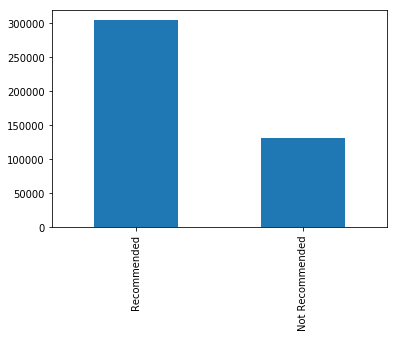

In [14]:
# seems like majority of reviews are for recommendations, interesting
df['recommendation'].value_counts().plot(kind="bar")
plt.show()

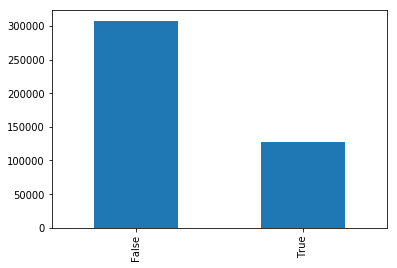

In [8]:
# most games are not early access
df['is_early_access_review'].value_counts().plot(kind="bar")
plt.show()

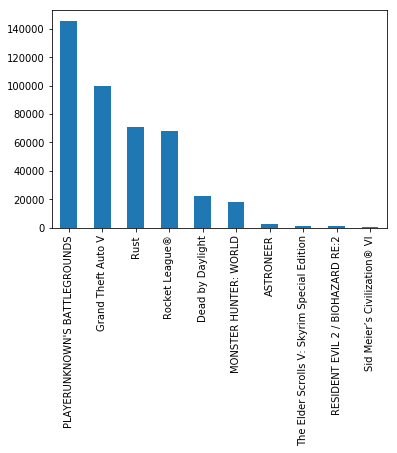

In [11]:
# exponential dropoff, most reviews are for PUBG
df['title'].value_counts()[:10].plot(kind="bar")
plt.show()

In [13]:
# only 48 unique games... hmm
len(df['title'].unique())

48

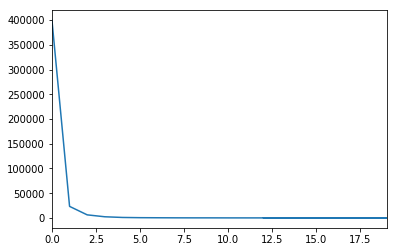

In [17]:
# as expected, most reviews dont get voted for being funny
df['funny'].value_counts()[:20].plot()
plt.show()

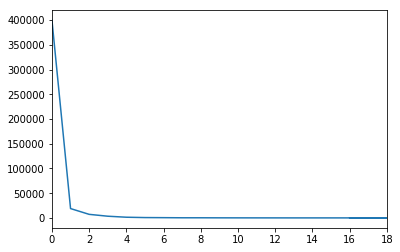

In [18]:
# as expected, most reviews dont get voted for being helpful
df['helpful'].value_counts()[:20].plot()
plt.show()

(array([4.34834e+05, 3.90000e+01, 1.20000e+01, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.  ,  1408.55,  2817.1 ,  4225.65,  5634.2 ,  7042.75,
         8451.3 ,  9859.85, 11268.4 , 12676.95, 14085.5 , 15494.05,
        16902.6 , 18311.15, 19719.7 , 21128.25, 22536.8 , 23945.35,
        25353.9 , 26762.45, 28171.  ]),
 <a list of 20 Patch objects>)

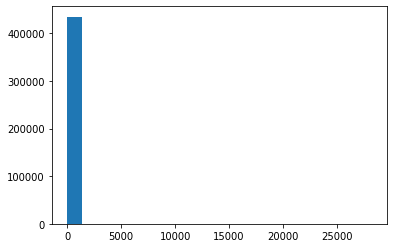

In [6]:
plt.hist(df.helpful.tolist(), bins=20)

In [27]:
# 91% of the data is 0 helpful
np.percentile(df.helpful.tolist(), 97)

2.0

In [43]:
np.percentile(df.helpful.tolist(), 91.9)

1.0

# see what funny + helpful does

In [5]:
funny = df.funny.tolist()
helpful = df.helpful.tolist()

In [8]:
useful = []
for i in range(len(funny)):
    useful.append(funny[i] + helpful[i])

In [14]:
np.percentile(useful, 91)

0.0

In [ ]:
df.recom